<a href="https://colab.research.google.com/github/Karthik-kudikilla/2216116-AIML/blob/main/Gradient_Discent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Creating a Dataframe
import pandas as pd

#Creating an Empty Dataframe
df=pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [2]:
#Initialize list Elements
data=[0.2,0.4,0.6,0.8]

df=pd.DataFrame(data,columns=['Bacteria_size'])
df['Max_Growth']=[3.4,3.8,4.2,4.6]
df

,Bacteria_size,Max_Growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [3]:
#splitting the data
x_train = df.iloc[:3,:-1]
y_train = df.iloc[:3,-1:]
x_test = df.iloc[3:,:-1]
y_test = df.iloc[3:,-1:]

In [4]:
x_train

,Bacteria_size
0,0.2
1,0.4
2,0.6


In [10]:
import sympy as sym
from sympy import *

In [16]:
#step1:Initialize model parameters
import sympy as sym
from sympy import *
mi = 1                                                                            
ci = -1
n = 0.01
epochs = 250
iter = 1

ns = len(x_train)
# Step2: Start iteration
for iter in range(1,epochs+1):
  print("Iteration : {}".format(iter))
  print('++++++++++++++++++++++++++++')
  #step3: track samples
  for sample in range(0,ns):
    xa = x_train['Bacteria_size'][sample] #0.2
    ya = y_train['Max_Growth'][sample] #3.4
    print("-->sample {}".format(sample+1)+"x={}".format(xa)+"y={}".format(ya))

    #step 4:Calculate the Gradient
    E = (0.5)*(y-m*x-c)**2 # Gradient Function
    x = sym.Symbol('x')
    y = sym.Symbol('y')
    m = sym.Symbol('m')
    c = sym.Symbol('c')

    deltaE_m = sym.diff(E,m)
    deltaE_c = sym.diff(E,c)

    #substituting values
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    deltaE_c=deltaE_c.subs(m,mi)
    deltaE_c=deltaE_c.subs(c,ci)
    deltaE_c=deltaE_c.subs(x,xa)
    deltaE_c=deltaE_c.subs(y,ya)

    print('deltaE_m:',deltaE_m)
    print('deltaE_c',deltaE_c)

    #Step5: Calculate step length
    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

    #step6:Updating model parameters
    mi=mi+del_m
    ci=ci+del_c
    print("m:{}".format(mi))
    print("c:{}".format(ci))

print('++++++++++++++++++++++++++++++++++++++')
print('Optimal Values:')
print("m:{}".format(mi))
print("c:{}".format(ci))


Iteration : 1
++++++++++++++++++++++++++++
-->sample 1x=0.2y=3.4
deltaE_m: -0.840000000000000
deltaE_c -4.20000000000000
m:1.00840000000000
c:-0.958000000000000
-->sample 2x=0.4y=3.8
deltaE_m: -1.74185600000000
deltaE_c -4.35464000000000
m:1.02581856000000
c:-0.914453600000000
-->sample 3x=0.6y=4.2
deltaE_m: -2.69937747840000
deltaE_c -4.49896246400000
m:1.05281233478400
c:-0.869463975360000
Iteration : 2
++++++++++++++++++++++++++++
-->sample 1x=0.2y=3.4
deltaE_m: -0.811780301680640
deltaE_c -4.05890150840320
m:1.06093013780081
c:-0.828874960275968
-->sample 2x=0.4y=3.8
deltaE_m: -1.68180116206226
deltaE_c -4.20450290515565
m:1.07774814942143
c:-0.786829931224411
-->sample 3x=0.6y=4.2
deltaE_m: -2.60410862494293
deltaE_c -4.34018104157155
m:1.10378923567086
c:-0.743428120808696
Iteration : 3
++++++++++++++++++++++++++++
-->sample 1x=0.2y=3.4
deltaE_m: -0.784534054734905
deltaE_c -3.92267027367452
m:1.11163457621821
c:-0.704201418071951
-->sample 2x=0.4y=3.8
deltaE_m: -1.62381903503387

In [17]:
#y =1.77x+0.99 --> BestFit Line
y_train_pred=[]
for i in range(0,len(x_train)):
  y_cal = mi*x_train['Bacteria_size'][i]+ci
  y_train_pred.append(y_cal)
y_train_pred

[3.30332048506920, 3.79429343423810, 4.28526638340701]

In [18]:
y_train_list = list(y_train['Max_Growth'])
y_train_list

[3.4, 3.8, 4.2]

In [19]:
Error=[]
for i in range(0,len(x_train)):
  err=(y_train_list[i]-y_train_pred[i])
  Error.append(err)
Error

[0.0966795149308020, 0.00570656576189688, -0.0852663834070082]

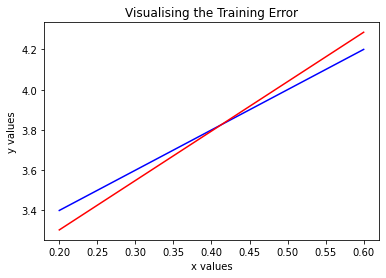

In [23]:
import matplotlib.pyplot as plt
plt.plot(x_train,y_train_list,label='y_train',color='blue')
plt.plot(x_train,y_train_pred,label='y_predicted',color='red')

plt.title('Visualising the Training Error')
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()